In [208]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# randomise some data
data = [['NumRobots', 'NewImplementation', 'Success', 'Duration']]

for i in [1,3,5,10,15]:
    for j in range(5):
        data.append([i, False, True, random.uniform(1, 60)])
        data.append([i, True, True, random.uniform(1, 60)])
        data.append([i, False, False, None])
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df[1:]

                             Success Rate  Mean Successful Duration  \
NumRobots NewImplementation                                           
1         False                       0.5                 33.354767   
          True                        1.0                 33.020836   
3         False                       0.5                 25.034568   
          True                        1.0                 31.604227   
5         False                       0.5                 25.219800   
          True                        1.0                 35.261017   
10        False                       0.5                 45.867865   
          True                        1.0                 28.346951   
15        False                       0.5                 37.274036   
          True                        1.0                 22.155292   

                             Duration Variance  
NumRobots NewImplementation                     
1         False                     197.229350  


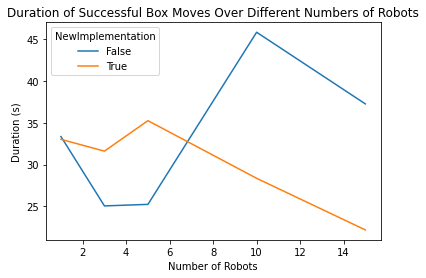

In [213]:
def outputs(df):
    # show results in terminal
    sortedData = df.groupby(by=['NumRobots','NewImplementation'])
    output = pd.DataFrame()
    output['Success Rate'] = sortedData['Success'].mean()
    output['Mean Successful Duration'] = sortedData['Duration'].mean()
    output['Duration Variance'] = sortedData['Duration'].var()
    print(output)
    
    fig = df.groupby(['NumRobots','NewImplementation']).mean()['Duration'].unstack() \
        .plot(title='Duration of Successful Box Moves Over Different Numbers of Robots', \
        xlabel='Number of Robots', ylabel='Duration (s)').get_figure()
    fig.savefig('Duration over numRobots Plot.png')

outputs(df)

In [200]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/home/daniel/Documents/DMAS/box-pushing/webots/controllers/supervisor/expTimings.csv")
df.head()

,NumRobots,NewImplementation,Success,Duration
0,1,False,True,3.072
1,1,False,False,NaN
2,1,False,False,NaN
3,3,False,False,NaN
4,3,False,True,26.624


In [214]:
sortedData = df.groupby(by=['NumRobots','NewImplementation'])

output = pd.DataFrame()
output['Success Rate'] = sortedData['Success'].mean()
output['Mean Successful Duration'] = sortedData['Duration'].mean()
output['Duration Variance'] = sortedData['Duration'].var()

output

Success Rate  Mean Successful Duration  \
NumRobots NewImplementation                                           
1         False                       0.5                 33.354767   
          True                        1.0                 33.020836   
3         False                       0.5                 25.034568   
          True                        1.0                 31.604227   
5         False                       0.5                 25.219800   
          True                        1.0                 35.261017   
10        False                       0.5                 45.867865   
          True                        1.0                 28.346951   
15        False                       0.5                 37.274036   
          True                        1.0                 22.155292   

                             Duration Variance  
NumRobots NewImplementation                     
1         False                     197.229350  
          True                      210.041732  
3         False                     290.905755  
          True                      387.176780  
5         False                     451.830481  
          True                       95.839021  
10        False                     187.891138  
          True                      416.524236  
15        False                     155.031882  
          True                      248.490619

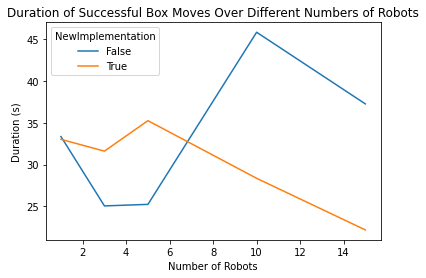

In [212]:
fig = df.groupby(['NumRobots','NewImplementation']).mean()['Duration'].unstack() \
    .plot(title='Duration of Successful Box Moves Over Different Numbers of Robots', xlabel='Number of Robots', ylabel='Duration (s)').get_figure()
fig.savefig('Duration over numRobots Plot.png')

NewImplementation
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

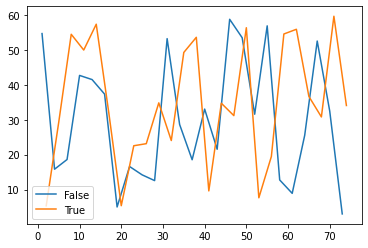

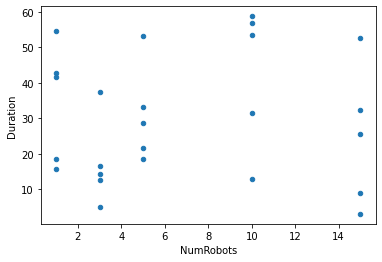

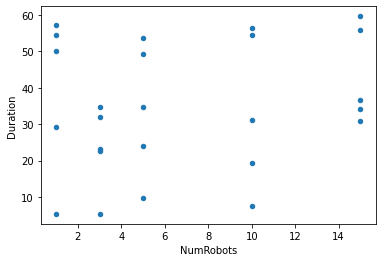

In [158]:
success = df[df["Success"]==True]

success.groupby('NewImplementation')['Duration'].plot(x='NumRobots',legend=True)

success.groupby('NewImplementation').plot.scatter(x='NumRobots',y='Duration')

In [90]:
df[(df['Success']==True) & (df['NewImplementation']== False)]

,NumRobots,NewImplementation,Success,Duration
1,1,False,True,45.560582
4,1,False,True,48.186442
7,1,False,True,2.153307
10,1,False,True,48.405677
13,1,False,True,10.52505
